Import Libraries


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.impute import SimpleImputer


Load Data

In [2]:
df = pd.read_csv('/creditcard.csv')


Understand Data


In [3]:
print(df.columns)
print(df.head(3))
print(df.info())
print(df.describe())


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62 

Check for Missing Values


In [4]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [17]:
# Create an imputer object with a strategy for filling missing values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data to fill missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verify that there are no missing values left
print(df_imputed.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Analyze Imbalance


In [18]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))
print('Fraction of Fraud Cases:', outlierFraction)
print('Number of Fraud Cases:', len(fraud))
print('Number of Valid Transactions:', len(valid))


Fraction of Fraud Cases: 0.001812148188418108
Number of Fraud Cases: 480
Number of Valid Transactions: 264879


Amount Details


In [19]:
print("Amount details of the fraudulent transactions")
print(fraud['Amount'].describe())
print("Details of valid transactions")
print(valid['Amount'].describe())


Amount details of the fraudulent transactions
count     480.000000
mean      121.408896
std       257.964187
min         0.000000
25%         1.000000
50%         8.590000
75%       105.080000
max      2125.870000
Name: Amount, dtype: float64
Details of valid transactions
count    264879.000000
mean         89.735848
std         248.783621
min           0.000000
25%           5.990000
50%          22.760000
75%          79.000000
max       19656.530000
Name: Amount, dtype: float64


Visualize Data

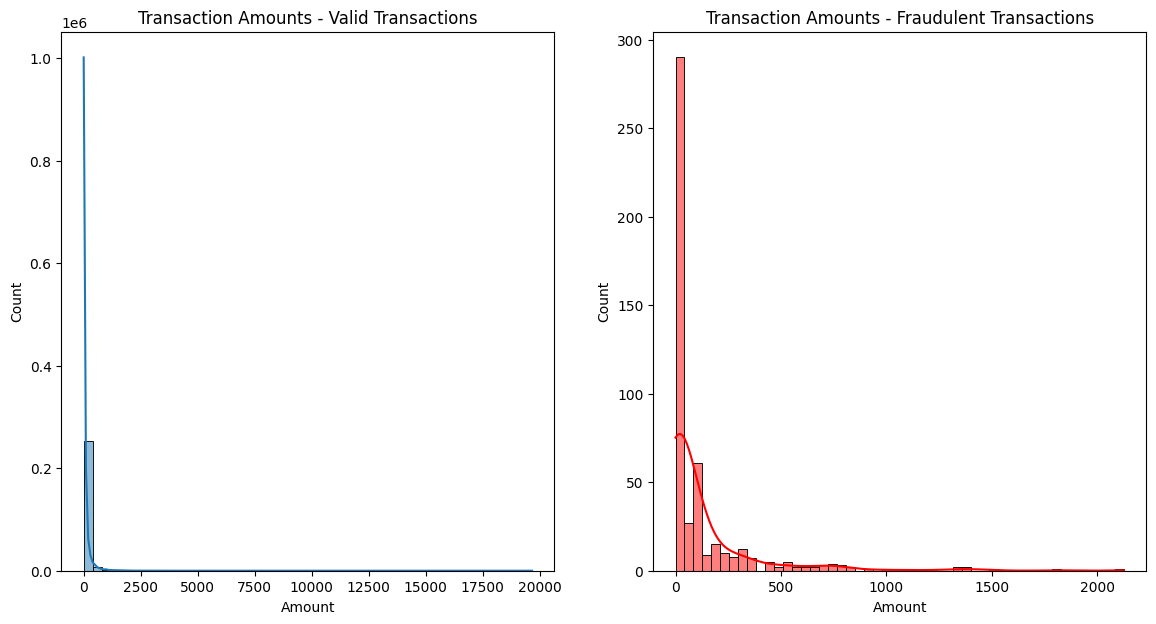

In [26]:
# Plot histograms of transaction amounts
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(valid['Amount'], bins=50, kde=True)
plt.title('Transaction Amounts - Valid Transactions')

plt.subplot(1, 2, 2)
sns.histplot(fraud['Amount'], bins=50, kde=True, color='red')
plt.title('Transaction Amounts - Fraudulent Transactions')

plt.show()


Correlation Matrix


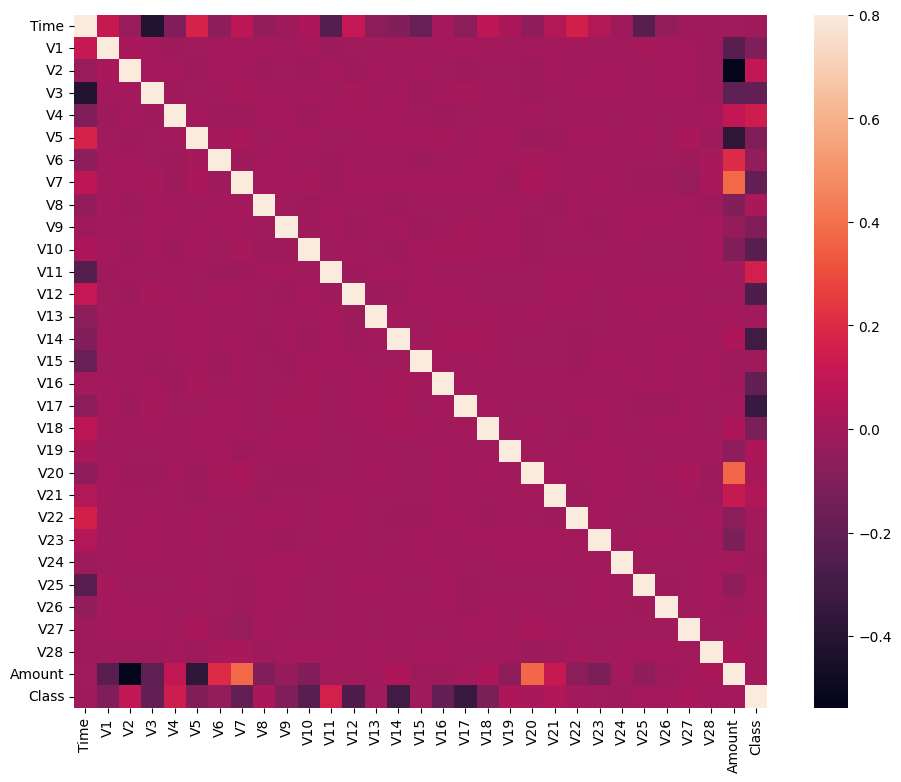

In [20]:
corrmat = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


Prepare Data


In [21]:
X = df.drop(['Class'], axis=1)
Y = df['Class']
xData = X.values
yData = Y.values


Split Data


In [22]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)


Build and Train Model


In [23]:
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)


Evaluate Model

In [24]:
# Evaluate model performance
acc = accuracy_score(yTest, yPred)
prec = precision_score(yTest, yPred)
rec = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
MCC = matthews_corrcoef(yTest, yPred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)
print("Matthews correlation coefficient:", MCC)


Accuracy: 0.9995854687971059
Precision: 0.9615384615384616
Recall: 0.7978723404255319
F1-Score: 0.8720930232558141
Matthews correlation coefficient: 0.8756965522492363


Visualize Confusion Matrix

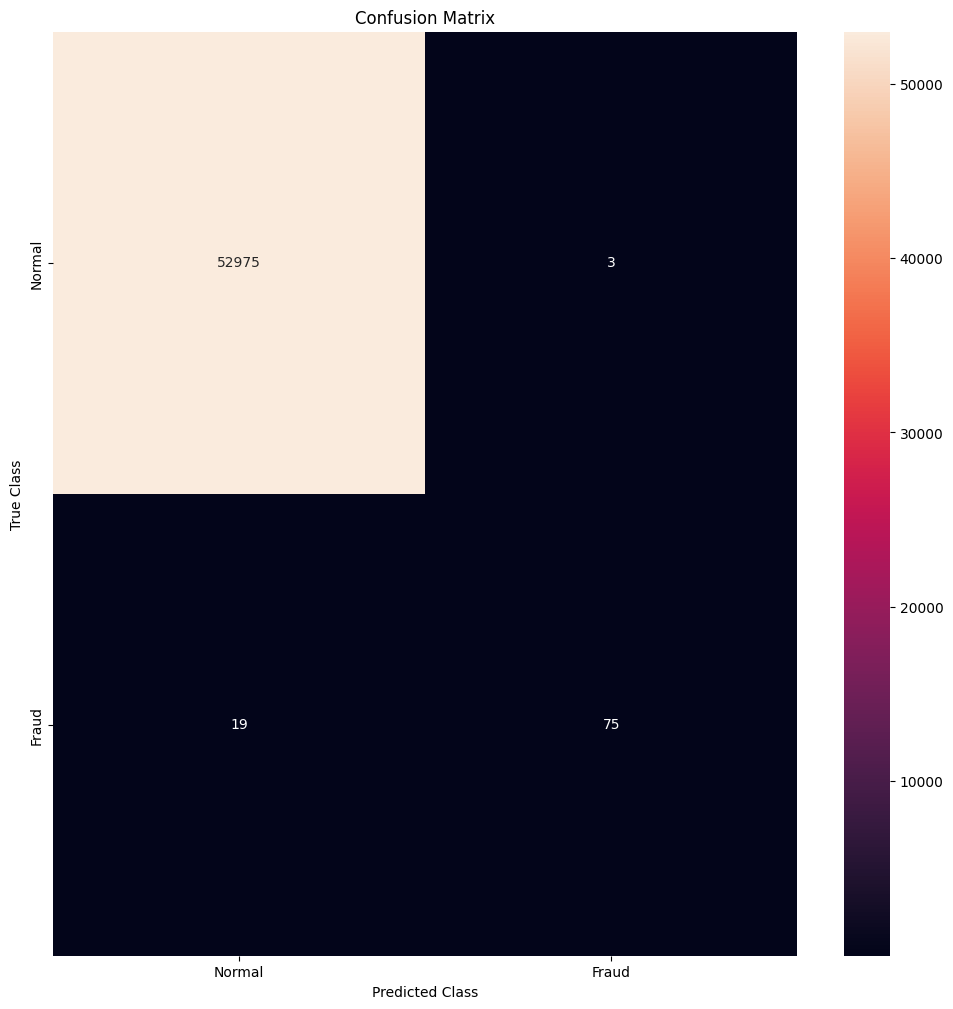

In [25]:
# Plot confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
